In [31]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from enum import Enum
import numpy as np

In [32]:
# Define enums and constants

class Column(Enum):
    AGE = 'What is your age?'
    GENDER = 'What is your gender?'
    RESIDENCY = 'Where do you currently live? '
    FREQUENCY = 'How often do you cycle?'
    ENVIRONMENT = 'In which environments do you regularly cycle?'
    REASON = 'What are your main reasons for cycling?'
    INJURED = 'Have you ever been injured whilst cycling?'
    HELMET = 'I always wear a helmet while cycling'
    MUSIC = 'I never listen to music / wear headphones while cycling'
    HANDLEBAR = 'I very rarely take a hand off the handlebars unless to perform a quick action (such as indicating)'
    EYES = 'I always keep my eyes on the road to stay vigilant'
    SHOULDER = 'I regularly perform shoulder checks to be aware of my surroundings'
    CLOSECAR = 'I am always aware when a car is close to me while cycling'
    BLINDSPOT = "I am always aware when I'm in another vehicles blind spot"
    SAFE = "I always feel safe when cycling on the road with other vehicles"
    PARKEDCAR = "I always cycle 2-3 feet away from parked cars"
    NOHELMETREASON = "If you did not answer 'Strongly Agree' to the statement 'I always wear a helmet while cycling', what are your reasons for not wearing a helmet?"
    EQUIPMENT = "Select all the safety equipment and technology that you regularly use while cycling?"
    RADARBRAND = "If you answered yes to having a bike radar, which brand/device do you use?"
    RADARCOMMENTS = "If you answered yes to having a bike radar, how useful do you find it? Does it improve your safety? What do you wish could be improved?"
    CHALLENGES = "What challenges do you experience which makes cycling feel unsafe (give as many reasons as you wish)?"
    TACTIHELM = "Based on the provided description, what are your thoughts on this product? Does it seem useful? What else could it do?"
    
titlesize = 18
axissize = 16
valuesize = 14
tablesize = 12


colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

df = pd.read_excel('survey-data.xlsx')
TOTAL_RESPONDENTS = len(df)

In [33]:
def create_table(data, colLabels, cellLoc='center', loc='right', colLoc='center', fontsize=12, scale=(0.5, 1.5)):
    cell_text = []
    
    # get percentage of total
    total = data.sum()
    percentage_values = (data / total) * 100
    
    # add values to table
    for index, value in data.items():
        perc = percentage_values.loc[index]
        cell_text.append([index, value, f'{perc:.2f}%'])
    cell_text.append(['', total, '100%'])
    
    # create and customise table
    table = plt.table(cellText=cell_text, colLabels=colLabels, cellLoc=cellLoc, loc=loc, colLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(fontsize)
    table.scale(*scale)
    

    
def create_bar_plot(data, x_label, y_label, title, grid=True, show_table=False, figsize=(10, 6), tablecols=None):
    fig, ax = plt.subplots(figsize=figsize)
    
    # plot data
    bars = data.plot(kind='bar', color=colors, zorder=2, ax=ax)
    plt.title(title, fontsize=titlesize)
    plt.xlabel(x_label, fontsize=axissize)
    plt.ylabel(y_label, fontsize=axissize)
    
    # adjust tick label size and rotation
    plt.tick_params(axis='both', which='major', labelsize=valuesize)
    plt.xticks(rotation=0)
    
    # add grid lines
    if grid:
        plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)
        
    # remove borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # add table
    if show_table:
        create_table(data=data, colLabels=tablecols, fontsize=tablesize)
        
        
        
def create_pie_chart(data, labels, title, explode=None, autopct='%1.1f%%', show_table=False, figsize=(10, 6), tablecols=None):
    fig, ax = plt.subplots(figsize=figsize)
        
    if explode is None:
        explode = [0] * len(data)
        
    plt.pie(data, labels=labels, colors=colors, explode=explode, autopct=autopct, startangle=90, counterclock=False, textprops={'fontsize': valuesize})
    plt.title(title, fontsize=16)
    
    # add table
    if show_table:
        create_table(data=data, colLabels=tablecols, fontsize=tablesize, scale=(1, 2))
        
        
        
def create_pie_charts(graphs):
    for graph in graphs:
        column = Column[graph].value
        count = df[column].value_counts().reindex(
            index=['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree'])
        create_pie_chart(data=count, labels=count.index, title=column,
                show_table=True, figsize=(10,8), tablecols=['Category', 'Number of Values', 'Percentage'])
        
      
    
def get_counts(data):
    reasons = {}
    for reason, count in data.items():
        answers = reason.split(';')
        for r in answers:
            if r == '': next
            elif r not in reasons:
                reasons[r] = count
            else:
                reasons[r] += count

                
    return pd.Series(reasons)



def get_counts_user_response(data, sets):
    counts = dict((k, 0) for k, v in sets.items())    

    # go through each unique answer
    for loc, count in data.items():
        found = False
        # go through each set of synonyms for each location
        for place, synonyms in sets.items():
            # go through each set of synonyms
            for syn in synonyms:
                if syn in loc.lower():
                    counts[place] += count
                    found = True
                    #print("found " + loc + " \twithin set " + place + ". \t\tTotal now at " + str(location_counts[place]))
                    break
            if found: break

        if not found:
            counts["misc"] += count
            #print("did not find " + loc)

    return pd.Series(counts)

## What is Your Age?

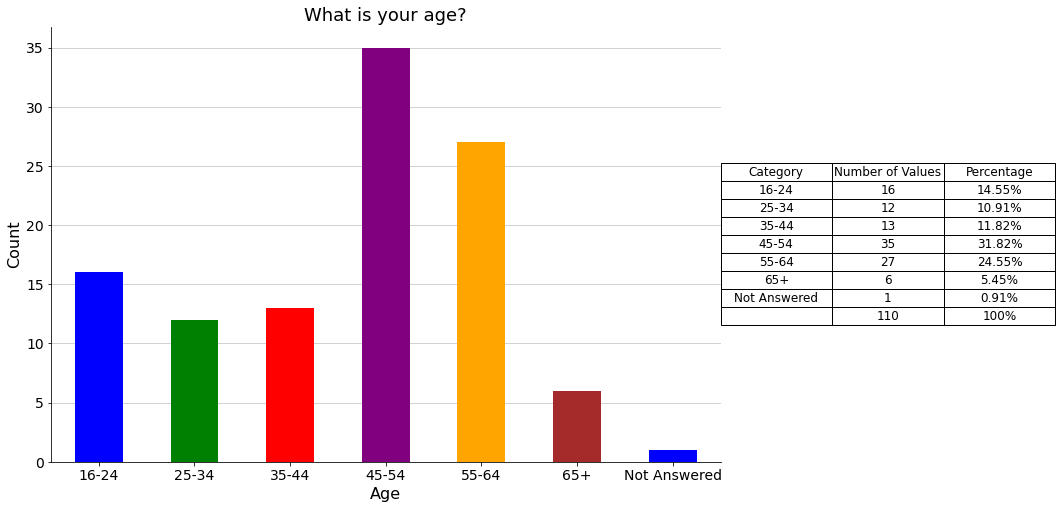

In [42]:
ages_count = df[Column.AGE.value].value_counts().sort_index(ascending=True)
not_answered_df = pd.Series([TOTAL_RESPONDENTS - ages_count.sum()], index=['Not Answered'])
ages_count = pd.concat([ages_count, not_answered_df])
               
create_bar_plot(data=ages_count, x_label='Age', y_label='Count', title=Column.AGE.value, 
                show_table=True, figsize=(12,8), tablecols=['Category', 'Number of Values', 'Percentage'])

plt.show()

## What is Your Gender?

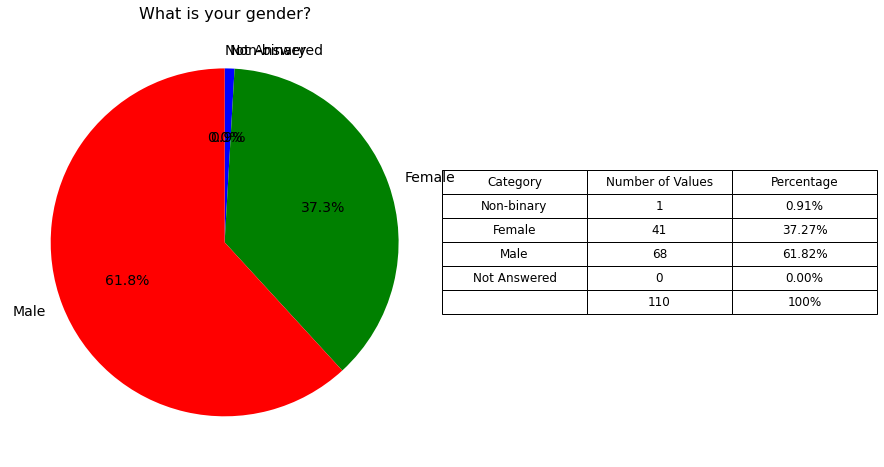

In [23]:
gender_count = df[Column.GENDER.value].value_counts().sort_values(ascending=True)
not_answered_df = pd.Series([TOTAL_RESPONDENTS - gender_count.sum()], index=['Not Answered'])
gender_count = pd.concat([gender_count, not_answered_df])

create_pie_chart(data=gender_count, labels=gender_count.index, title=Column.GENDER.value,
                show_table=True, figsize=(12,8), tablecols=['Category', 'Number of Values', 'Percentage'])

plt.show()

## Where do you currently live?

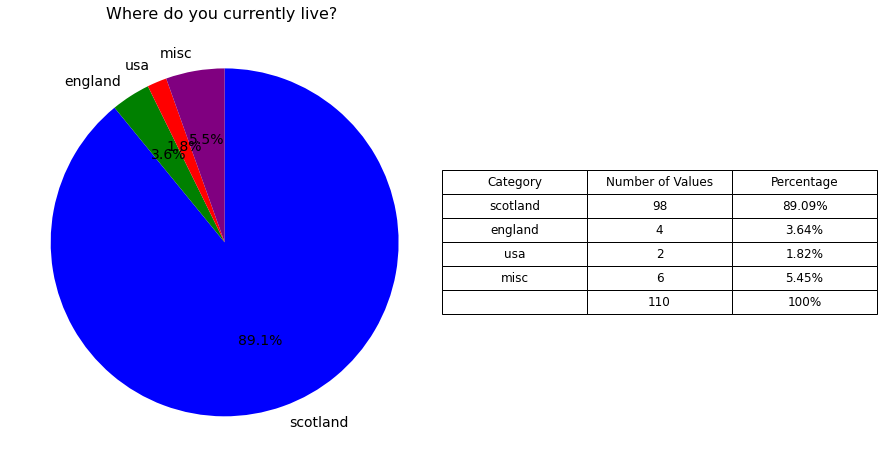

In [24]:
residency_count = df[Column.RESIDENCY.value].value_counts()

location_sets = {
    "scotland": {"glasgow", "dumbarton", "scotland", "kilbride", "shawlands", "bearsden", "stirling", 
                 "balfron", "elderslie", "jersey", "ayr", "cumbernauld", "gladgow", "sanquhar", "newton means", 
                 "milton of campsie", "lenzie"},
    "england": {"england", "hampshire", "london"},
    "usa": {"usa"},
    "misc": {"suburban", "thailand", "city", "iceland", "uk", "country"}
}



location_counts = get_counts_user_response(residency_count, location_sets)

create_pie_chart(data=location_counts, labels=location_counts.index, title=Column.RESIDENCY.value,
                show_table=True, figsize=(12,8), tablecols=['Category', 'Number of Values', 'Percentage'])

plt.show()

## How often do you cycle?

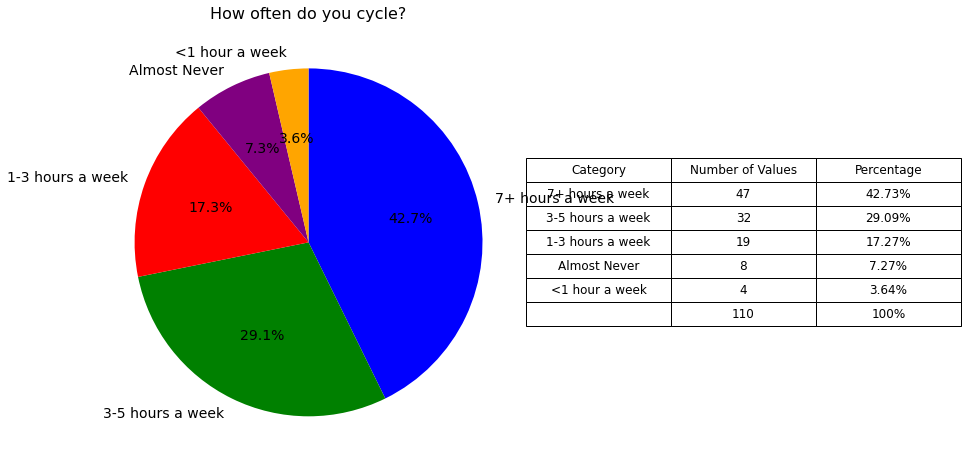

In [25]:
frequency_count = df[Column.FREQUENCY.value].value_counts()
create_pie_chart(data=frequency_count, labels=frequency_count.index, title=Column.FREQUENCY.value,
                show_table=True, figsize=(12,8), tablecols=['Category', 'Number of Values', 'Percentage'])

plt.show()

## In which environments do you regularly cycle?

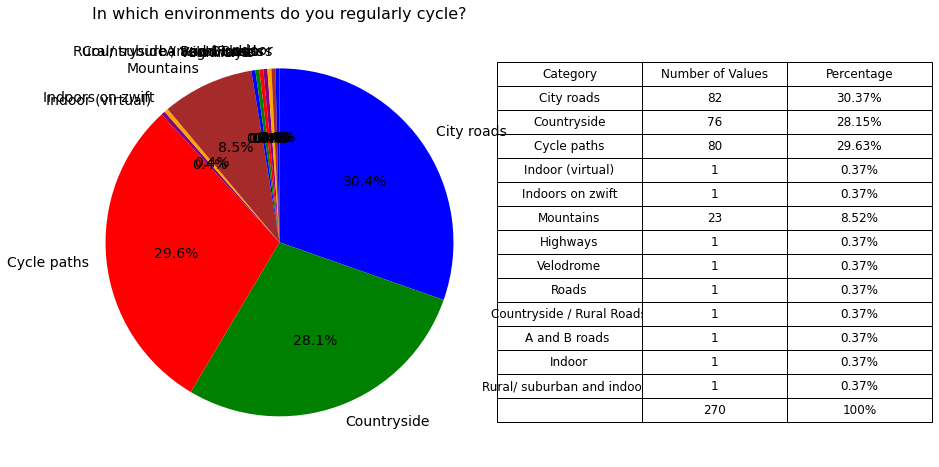

In [26]:
environment_count = df[Column.ENVIRONMENT.value].value_counts().sort_index(ascending=True)

counts = get_counts(environment_count)

create_pie_chart(data=counts, labels=counts.index, title=Column.ENVIRONMENT.value,
                show_table=True, figsize=(12,8), tablecols=['Category', 'Number of Values', 'Percentage'])

plt.show()

## What are your main reasons for cycling?

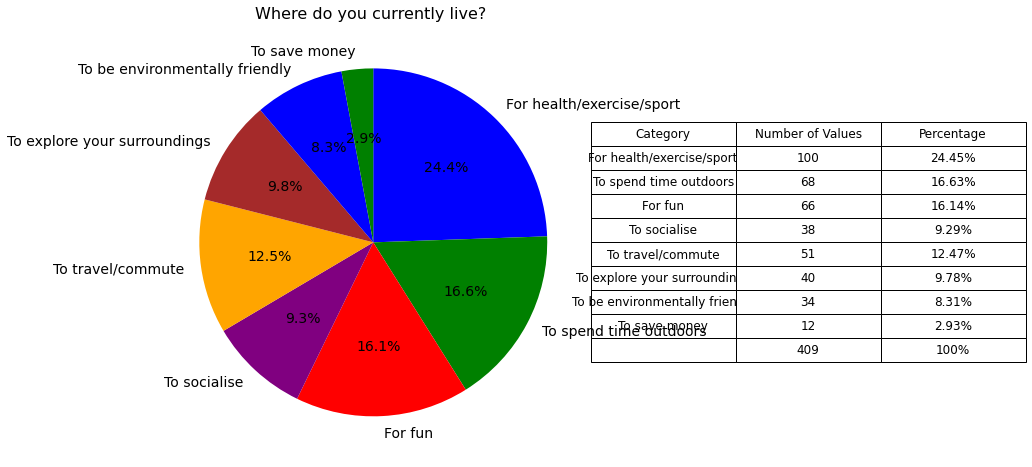

In [27]:
reason_count = df[Column.REASON.value].value_counts()

counts = get_counts(reason_count)

create_pie_chart(data=counts, labels=counts.index, title=Column.RESIDENCY.value,
                show_table=True, figsize=(10,8), tablecols=['Category', 'Number of Values', 'Percentage'])

plt.show()

## Have you ever been injured whilst cycling?

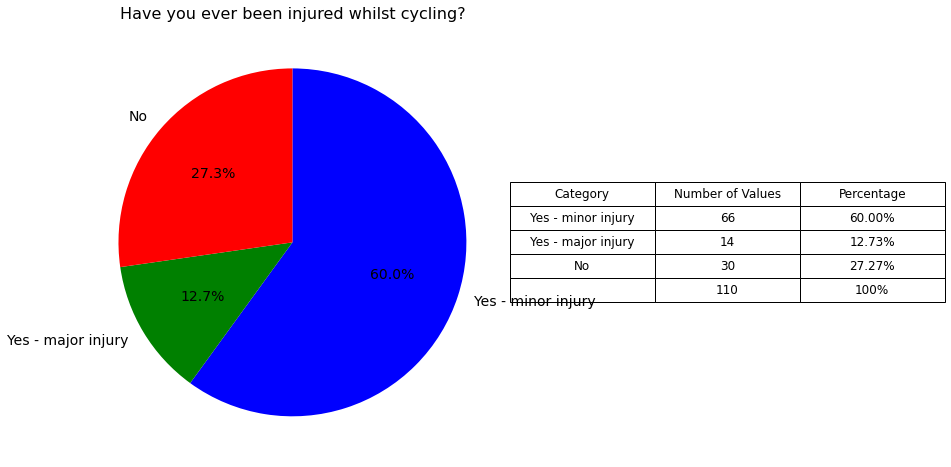

In [28]:
injury_count = df[Column.INJURED.value].value_counts().sort_index(ascending=False)
create_pie_chart(data=injury_count, labels=injury_count.index, title=Column.INJURED.value,
                show_table=True, figsize=(12,8), tablecols=['Category', 'Number of Values', 'Percentage'])

plt.show()

## If you answered yes to the previous question - can you briefly describe (in one or two sentences) how the accident occurred and if it could have been prevented in anyway?

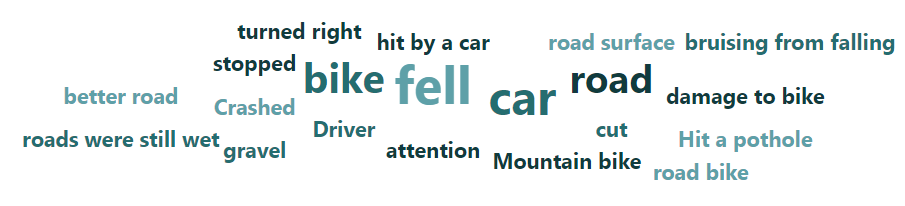

## Statements

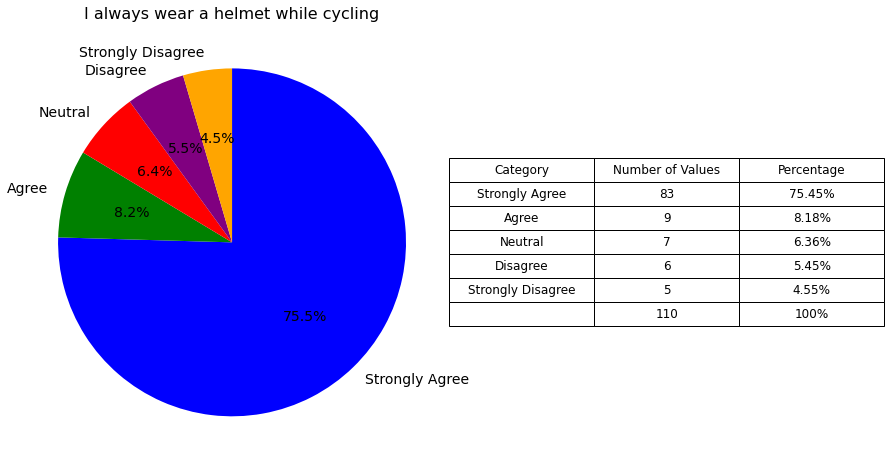

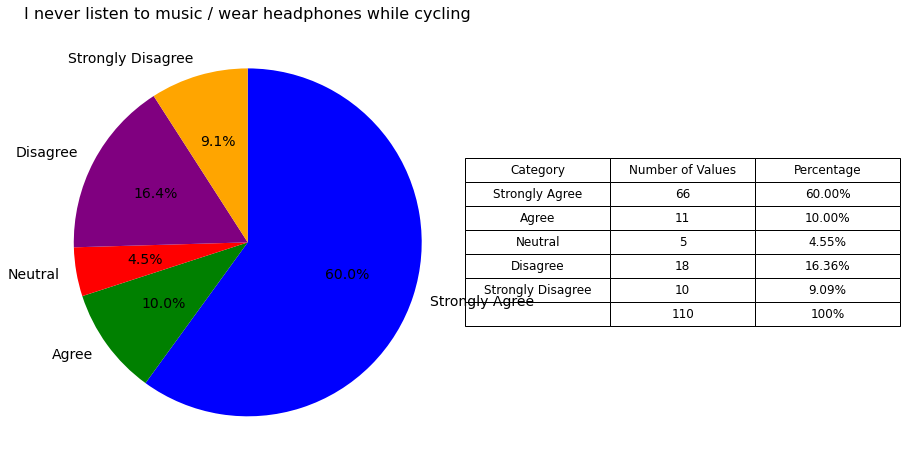

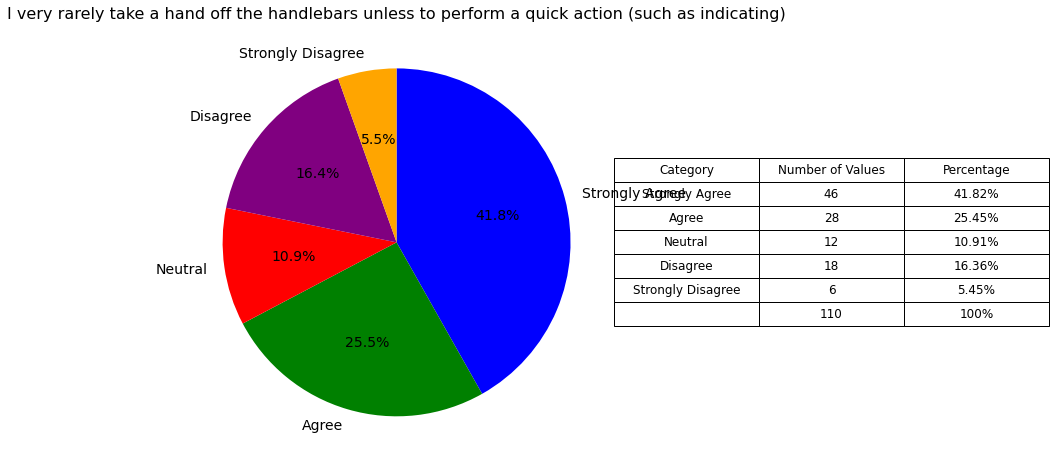

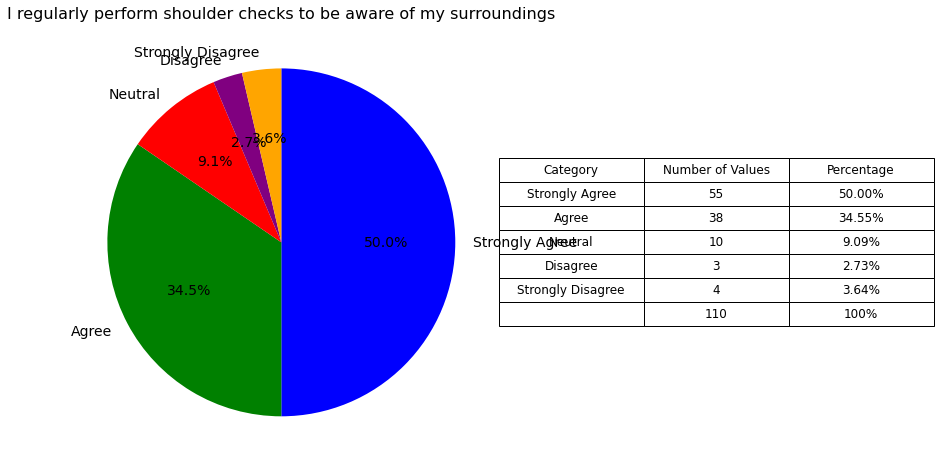

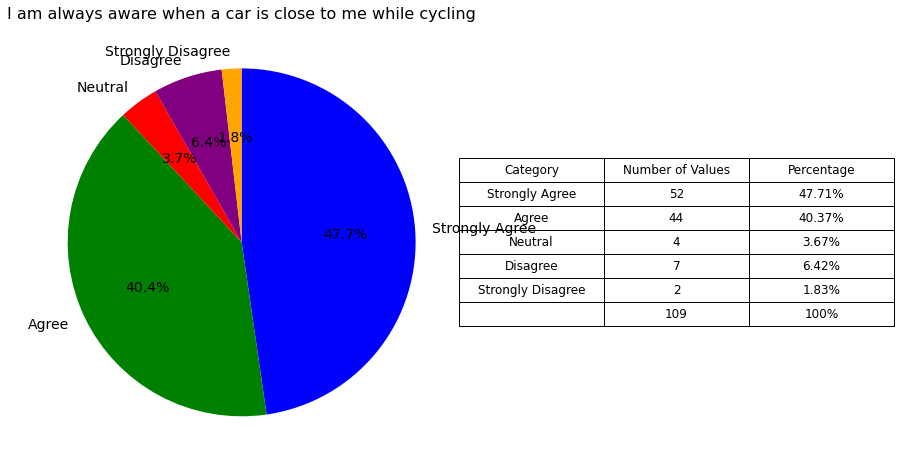

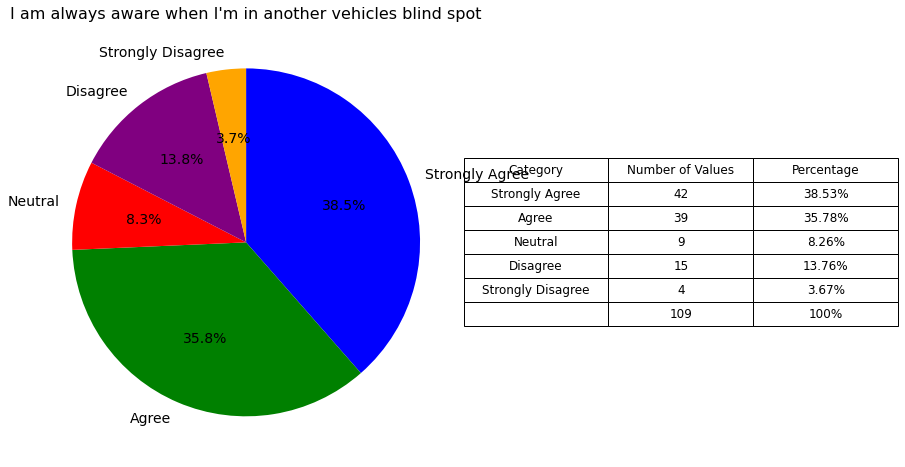

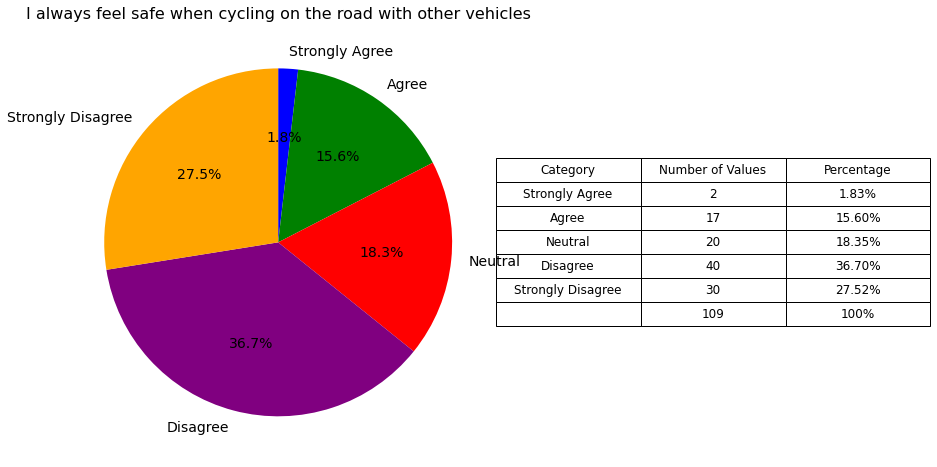

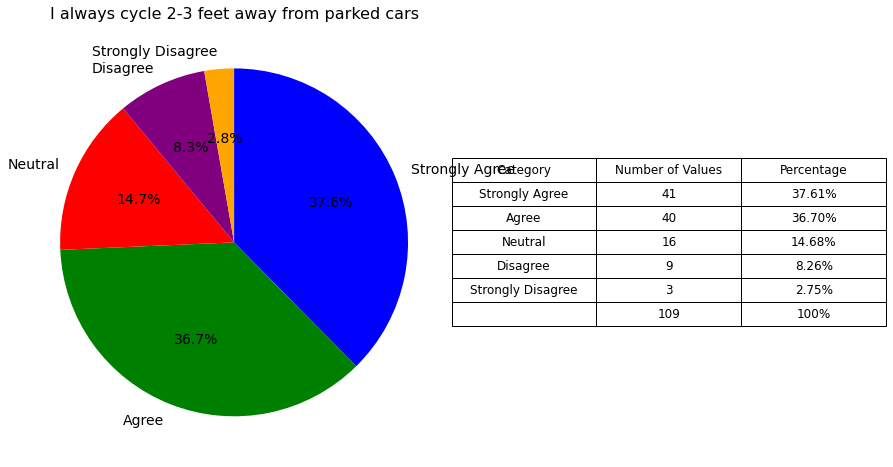

In [29]:
create_pie_charts(["HELMET", "MUSIC", "HANDLEBAR", "SHOULDER", "CLOSECAR", "BLINDSPOT", "SAFE", "PARKEDCAR"])

plt.show()

## What are your reasons for not wearing a helmet?

There were 26 responses to this question.

* Hire bikes do not provide helmets - 9
* Nuisance of carrying one around - 1
* Helmets do not work in severe crashes so why bother wearing one / flimsy evidence - 4
* Good cycle paths so don't need one or cycling slowly - 4
* Don't wear on short trips - 3
* Why are cyclists expected to wear one when other road users aren't - 1
* Forgetfullness - 2

However, evidence actually shows helmets are useful regardless of crash severity.

## Select all the safety equipment and technology that you regularly use while cycling?

* Cycle lights = 96
* Bike computer or mounted smartphone = 67
* Reflective gear = 71
* Helmet = 102
* Mirrors = 7
* Cameras = 4
* Smart watch = 46
* Bike radar = 9

Bright clothing but not always hi-vis. Lights at dusk.                1
Cycle lights                                                         98
Bike computer or mounted smartphone                                  65
Reflective gear                                                      70
Helmet                                                              103
Mirrors                                                               7
Cameras and a sign on my backpack warning drivers I have cameras      1
Smart watch                                                          47
Bike radar                                                            9
Cameras, Front, Rear, Helmet                                          1
Camera front and rear                                                 1
Phone with Strava and beacon                                          1
Bike cameras                                                          1
Power meter, HR monitor.                                        

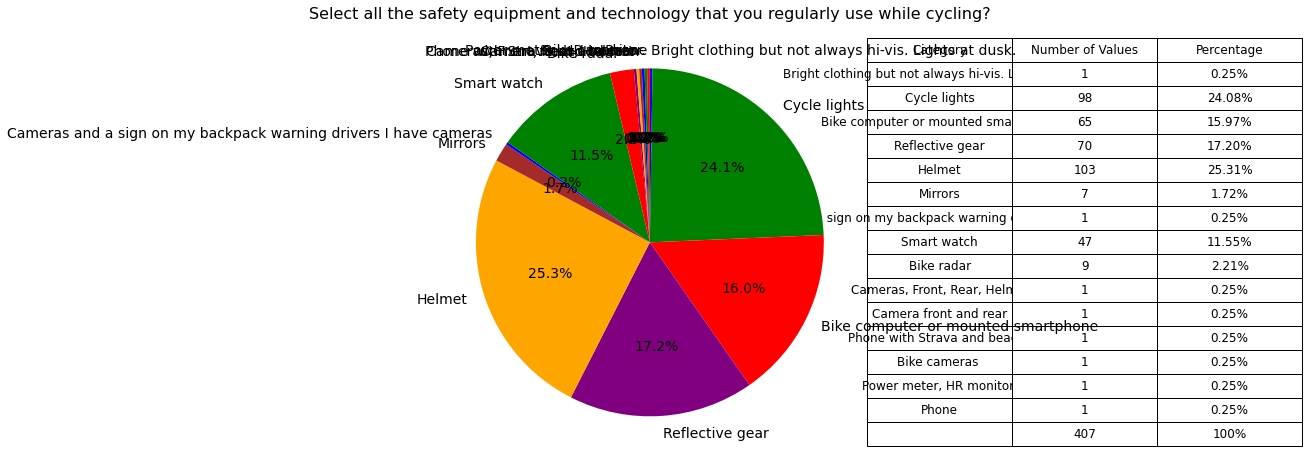

In [43]:
equip_count = df[Column.EQUIPMENT.value].value_counts().sort_index(ascending=True)

counts = get_counts(equip_count)

print(counts)

create_pie_chart(data=counts, labels=counts.index, title=Column.EQUIPMENT.value,
                show_table=True, figsize=(10,8), tablecols=['Category', 'Number of Values', 'Percentage'])

plt.show()

## If you answered yes to having a bike radar, which brand/device do you use?

All 9 respondents answered having a Garmin radar, with 2 specfically saying they use the Garmin Varia RTL515 - the one being used in development of this project.

## If you answered yes to having a bike radar, how useful do you find it? Does it improve your safety? What do you wish could be improved?

> very useful. really helps me know what is behind me. haptics :-)

> I appreciate it for alerting me to cars behind me, including multiple cars. It is important enough that I am on my third one. I wish they were less expensive and more durable (the battery can only be charged so many times and it’s hard to tell what the battery level is)

> Very useful, game changing. I can see when a car is behind me without looking and it helps me merge into other lanes.

> Very good

> Ensures that I am aware of vehicles approaching from the rear, particularly useful when hearing is affected by wind noise. I would have bought the later version with camera if it had been available at the time of purchase.

> It’s helps with vehicle awareness, especially from behind. Unit cost is the main disadvantage.

> It is excellent; tracks up to 4 vehicles. It occasionally disconnects, but otherwise is brilliant.

> It’s fantastic. 95% accurate. Improves safety. Useful when I have no one behind me and I can sip my water. Doesn’t detect when I cycle around a bend and cars are still behind I don’t have camera version as picture quality was poor

> Very when training

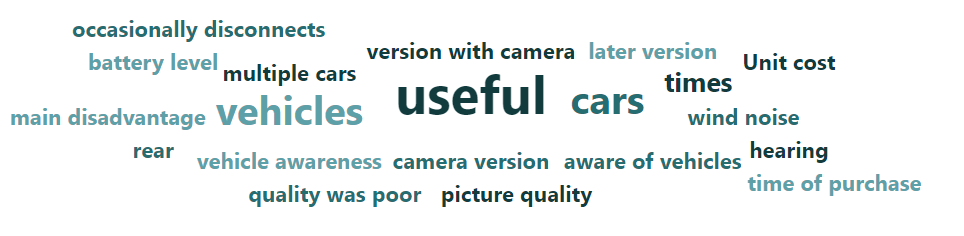

## What challenges do you experience which makes cycling feel unsafe (give as many reasons as you wish)?


* close passes from cars / crowded roads = 42
* aggressive / speeding drivers = 19
* lack of respect / angry drivers = 8
* lack of awareness from drivers (such as at junctions, merging dooring) / not feeling visisble = 13
* poor cycling infrastructure (potholes, lack of cycle spaces, etc) = 38
* pedestrains walking onto cycle path = 2
* bike theft = 1
* loose dogs = 4
* other cyclists = 2
* weather = 5
* navigation = 3

Mentioned many times is overtaking

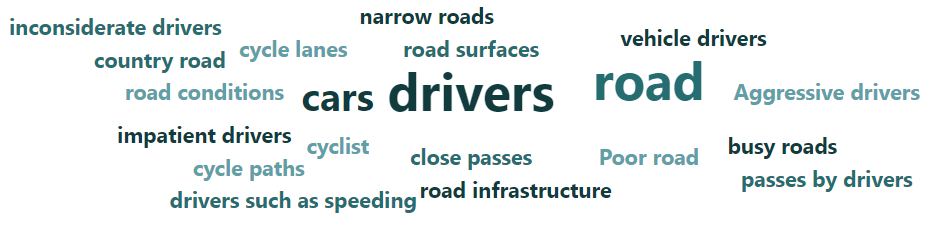

## Based on the provided description, what are your thoughts on this product? Does it seem useful? What else could it do?

- gimmick / too complex
- don’t think helmets are useful
- already aware of cars around
- think it would be buzzing constantly in busy traffic
- buzzing is distracting
- okay idea but would rather have change in drivers

26% of respondents answers included the word 'useful'

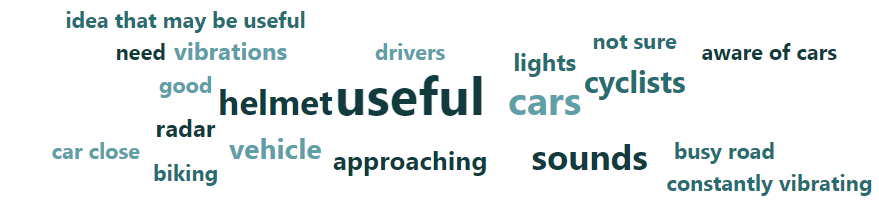